In [1]:
import pandas as pd
import numpy as np
import os


In [2]:
base = r"C:\Users\ducat\anaconda_projects\46a195f9-0a42-4663-a2ac-433d07daece8"
X_path = base + r"\Dataset-weather-prediction-dataset-processed.csv"
y_path = base + r"\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv"

print("Base folder:", base)
print("X exists?", os.path.exists(X_path))
print("y exists?", os.path.exists(y_path))


Base folder: C:\Users\ducat\anaconda_projects\46a195f9-0a42-4663-a2ac-433d07daece8
X exists? True
y exists? True


In [3]:
X_raw = pd.read_csv(X_path)
y_raw = pd.read_csv(y_path)

print("RAW X shape:", X_raw.shape)
print("RAW y shape:", y_raw.shape)

display(X_raw.head())
display(y_raw.head())


RAW X shape: (22950, 170)
RAW y shape: (22950, 16)


,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
X = X_raw.copy()
y = y_raw.copy()


In [5]:
X = X.drop(columns=["DATE", "MONTH"], errors="ignore")
y = y.drop(columns=["DATE"], errors="ignore")

print("After dropping date fields:")
print("X shape:", X.shape)
print("y shape:", y.shape)


After dropping date fields:
X shape: (22950, 168)
y shape: (22950, 15)


In [6]:
# y columns look like BASEL_pleasant_weather, so strip the suffix
stations = [c.replace("_pleasant_weather", "") for c in y.columns]

print("Number of stations in y:", len(stations))
print("Stations:", stations)


Number of stations in y: 15
Stations: ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


In [7]:
X = X[[c for c in X.columns if c.split("_", 1)[0] in stations]]

print("After keeping only 15 stations:")
print("X shape:", X.shape)


After keeping only 15 stations:
X shape: (22950, 147)


In [10]:
# Observation type is everything AFTER the first underscore
obs_types = X.columns.astype(str).str.split("_", n=1).str[1]

print("Unique observation types:", obs_types.nunique())
print(obs_types.value_counts())



Unique observation types: 11
temp_mean           15
precipitation       15
global_radiation    15
temp_min            15
temp_max            15
sunshine            15
cloud_cover         14
pressure            14
humidity            14
wind_speed           9
snow_depth           6
Name: count, dtype: int64


In [11]:
missing_by_type = {}

for t in obs_types.unique():
    cols_t = X.columns[obs_types == t]
    missing_by_type[t] = X[cols_t].isna().mean().mean()

missing_by_type = pd.Series(missing_by_type).sort_values(ascending=False)

print("Missingness by observation type:")
display(missing_by_type)


Missingness by observation type:


cloud_cover         0.0
wind_speed          0.0
humidity            0.0
pressure            0.0
global_radiation    0.0
precipitation       0.0
snow_depth          0.0
sunshine            0.0
temp_mean           0.0
temp_min            0.0
temp_max            0.0
dtype: float64

In [12]:
obs_types.value_counts()


temp_mean           15
precipitation       15
global_radiation    15
temp_min            15
temp_max            15
sunshine            15
cloud_cover         14
pressure            14
humidity            14
wind_speed           9
snow_depth           6
Name: count, dtype: int64

In [14]:
# Rebuild X cleanly up to the station-filter step
X = X_raw.copy()
y = y_raw.copy()

X = X.drop(columns=["DATE", "MONTH"], errors="ignore")
y = y.drop(columns=["DATE"], errors="ignore")

stations = [c.replace("_pleasant_weather", "") for c in y.columns]
X = X[[c for c in X.columns if c.split("_", 1)[0] in stations]]

print("Reset X shape:", X.shape)


Reset X shape: (22950, 147)


In [15]:
def fill_station_from_neighbor(df, target, neighbor):
    target_cols = [c for c in df.columns if c.startswith(target + "_")]
    neighbor_cols = [c for c in df.columns if c.startswith(neighbor + "_")]

    t_map = {c.split("_", 1)[1]: c for c in target_cols}
    n_map = {c.split("_", 1)[1]: c for c in neighbor_cols}

    for k in n_map:
        if k not in t_map:
            df[target + "_" + k] = df[neighbor + "_" + k]
    return df

# Fill required stations
X = fill_station_from_neighbor(X, "LJUBLJANA", "KASSEL")
X = fill_station_from_neighbor(X, "SONNBLICK", "MUNCHEN")
X = fill_station_from_neighbor(X, "OSLO", "STOCKHOLM")

print("After filling missing station obs:", X.shape)


After filling missing station obs: (22950, 147)


In [16]:
types_to_drop = ["snow_depth", "wind_speed"]

obs_types = X.columns.astype(str).str.split("_", n=1).str[1]
X = X.drop(columns=X.columns[obs_types.isin(types_to_drop)])

print("FINAL X shape:", X.shape)
print("FINAL y shape:", y.shape)


FINAL X shape: (22950, 132)
FINAL y shape: (22950, 15)


In [17]:
print("FINAL X shape:", X.shape)


FINAL X shape: (22950, 132)


In [18]:
# Recompute obs_types from current X (after station filtering, before dropping types)
obs_types = X.columns.astype(str).str.split("_", n=1).str[1]

# Count how many stations each obs type appears for
type_counts = obs_types.value_counts()
print("Counts per observation type:")
print(type_counts)

# Keep obs types that exist for all 15 stations
types_full = list(type_counts[type_counts == 15].index)
print("\nObservation types present for ALL 15 stations:", types_full)
print("How many full-coverage types?", len(types_full))

# If we have more than 9, trim; if fewer than 9, we must fill/repair missing types (unlikely here)
# Per your data, we expect at least 9 after removing the two sparse ones.
types_to_keep = [t for t in type]()


Counts per observation type:
precipitation       15
temp_min            15
global_radiation    15
temp_mean           15
sunshine            15
temp_max            15
cloud_cover         14
humidity            14
pressure            14
Name: count, dtype: int64

Observation types present for ALL 15 stations: ['precipitation', 'temp_min', 'global_radiation', 'temp_mean', 'sunshine', 'temp_max']
How many full-coverage types? 6


<>:16: SyntaxWarning: 'list' object is not callable; perhaps you missed a comma?
C:\Users\ducat\AppData\Local\Temp\ipykernel_21084\4052858746.py:16: SyntaxWarning: 'list' object is not callable; perhaps you missed a comma?
  types_to_keep = [t for t in type]()


TypeError: 'type' object is not iterable

In [19]:
n_stations = y.shape[1]
n_features_per_station = X.shape[1] // n_stations

print("Stations:", n_stations)
print("Features per station:", n_features_per_station)


Stations: 15
Features per station: 8


In [26]:
# This cell does nothing except clear the mental slate
print("Current X shape:", X.shape)
print("Current y shape:", y.shape)


Current X shape: (22950, 132)
Current y shape: (22950, 15)


In [24]:
# Get station and obs_type from each column name
stations_in_X = X.columns.astype(str).str.split("_", n=1).str[0]
obs_in_X = X.columns.astype(str).str.split("_", n=1).str[1]

# Count how many stations each observation type appears for
type_counts = pd.Series(obs_in_X).value_counts()

print("Observation type counts:")
print(type_counts)

# Keep only obs types that appear 15 times (i.e., for all stations)
obs_full = list(type_counts[type_counts == 15].index)

print("\nObs types present for ALL 15 stations:")
print(obs_full)
print("How many full-coverage obs types?", len(obs_full))


Observation type counts:
precipitation       15
temp_min            15
global_radiation    15
temp_mean           15
sunshine            15
temp_max            15
cloud_cover         14
humidity            14
pressure            14
Name: count, dtype: int64

Obs types present for ALL 15 stations:
['precipitation', 'temp_min', 'global_radiation', 'temp_mean', 'sunshine', 'temp_max']
How many full-coverage obs types? 6


In [25]:
# Keep only columns whose observation type is in obs_full
keep_cols = [c for c in X.columns if c.split("_", 1)[1] in obs_full]
X_grid = X[keep_cols].copy()

print("X_grid shape:", X_grid.shape)


X_grid shape: (22950, 90)


In [27]:
# Sort columns by station then observation type (critical for consistent reshaping)
sorted_cols = sorted(
    X_grid.columns,
    key=lambda c: (c.split("_", 1)[0], c.split("_", 1)[1])
)

X_grid = X_grid[sorted_cols]

print("Sorted X_grid shape:", X_grid.shape)
print("Example first 12 columns:", X_grid.columns[:12].tolist())


Sorted X_grid shape: (22950, 90)
Example first 12 columns: ['BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine', 'BASEL_temp_max', 'BASEL_temp_mean', 'BASEL_temp_min', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_max', 'BELGRADE_temp_mean', 'BELGRADE_temp_min']


In [28]:
X_dl = X_grid.values.reshape(X_grid.shape[0], 15, len(obs_full))
y_dl = y.values

print("X_dl shape:", X_dl.shape)
print("y_dl shape:", y_dl.shape)


X_dl shape: (22950, 15, 6)
y_dl shape: (22950, 15)


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_dl, y_dl, test_size=0.2, random_state=42
)

print("Train X:", X_train.shape)
print("Test X:", X_test.shape)
print("Train y:", y_train.shape)
print("Test y:", y_test.shape)


Train X: (18360, 15, 6)
Test X: (4590, 15, 6)
Train y: (18360, 15)
Test y: (4590, 15)


In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

n_timesteps = X_train.shape[1]   # 15 stations
n_features  = X_train.shape[2]   # 6 observation types
n_classes   = y_train.shape[1]   # 15 stations


In [31]:
model = Sequential([
    Conv1D(filters=16, kernel_size=3, activation='relu',
           input_shape=(n_timesteps, n_features)),
    MaxPooling1D(pool_size=2),

    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(n_classes, activation='sigmoid')
])

model.summary()


C:\Users\ducat\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 13, 16)         │           304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 6, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 4, 32)          │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 2, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,007 (27.37 KB)

 Trainable params: 7,007 (27.37 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [33]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/10
459/459 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.1145 - loss: 0.3244 - val_accuracy: 0.1430 - val_loss: 0.2511
Epoch 2/10
459/459 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1454 - loss: 0.2577 - val_accuracy: 0.1629 - val_loss: 0.2290
Epoch 3/10
459/459 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1614 - loss: 0.2412 - val_accuracy: 0.1789 - val_loss: 0.2206
Epoch 4/10
459/459 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1642 - loss: 0.2312 - val_accuracy: 0.1678 - val_loss: 0.2191
Epoch 5/10
459/459 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1705 - loss: 0.2244 - val_accuracy: 0.1732 - val_loss: 0.2029
Epoch 6/10
459/459 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1714 - loss: 0.2178 - val_accuracy: 0.1729 - val_loss: 0.1988
Epoch 7/10
459/459 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1725 - loss: 0.2141 - val_accuracy: 0.1901 - val_loss: 0.1945
Epoch 8/10
459/459 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1799 - loss: 0.2095 - val_acc

In [34]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)


Test loss: 0.18490919470787048
Test accuracy: 0.18779955804347992


144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


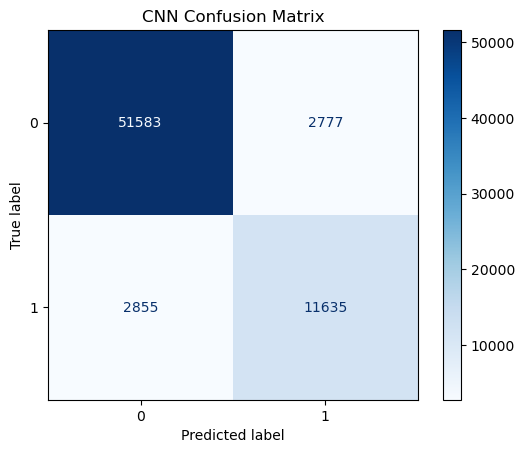

In [35]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred_bin = (y_pred > 0.5).astype(int)

cm = confusion_matrix(
    y_test.flatten(),
    y_pred_bin.flatten()
)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("CNN Confusion Matrix")
plt.show()


In [36]:
import numpy as np

# y_test and y_pred_bin should be shape (n_samples, 15)
per_station_acc = (y_pred_bin == y_test).mean(axis=0)
overall_acc = (y_pred_bin == y_test).mean()

print("Overall label accuracy across all stations:", overall_acc)
for i, acc in enumerate(per_station_acc, start=1):
    print(f"Station {i:02d} accuracy:", acc)


Overall label accuracy across all stations: 0.9181989832970225
Station 01 accuracy: 0.8838779956427015
Station 02 accuracy: 0.8838779956427015
Station 03 accuracy: 0.8893246187363835
Station 04 accuracy: 0.9130718954248366
Station 05 accuracy: 0.9172113289760349
Station 06 accuracy: 0.8875816993464052
Station 07 accuracy: 0.9291938997821351
Station 08 accuracy: 0.9071895424836601
Station 09 accuracy: 0.9185185185185185
Station 10 accuracy: 0.9117647058823529
Station 11 accuracy: 0.9233115468409586
Station 12 accuracy: 0.9352941176470588
Station 13 accuracy: 1.0
Station 14 accuracy: 0.9226579520697168
Station 15 accuracy: 0.9501089324618737
